## Context of Data

Company-wide Employees E-Commerce purchase data

Customers - Most purchased ones are belongs to Dietitian, Lawyers professionals

Transactions purchase range on average of $50

Transaction purchase period all through 24hours

Results obtained from Exploratory Data Analysis (EDA)

<font color=blue>

1. The customer with the highest number of purchase comes from the Dietitian Professionals

2. 'Brown Ltd' company's employees have purchased most values as $796.38

3. The TOP 5 companies employees placed the highest number of purchases as below:

        Brown Ltd
        Williams LLC
        Smith LLC
        Smith PLC
        Johnson Ltd

4. The TOP purchased customer brownsarah@gmail.com with the value as $198.83

5. The Top 5 customer's purchases are
        brownsarah@gmail.com    ==> $198.83
        wjohnson@yahoo.com      ==> $175.61
        cgray@gmail.com         ==> $154.41
        lawrenceemily@yahoo.com ==> $154.31
        wilsonjohn@yahoo.com    ==> $153.36

6. The highest number of purchase are done in the evening(PM)

7. The highest number of purchase are done by [ru] language customers

8. Majority of the customers(around 79.2%) customers are using Mozilla for browsing and to purchase items
</font>

In [2]:
import numpy as np
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ecom = pd.read_csv('Ecommerce_Purchases.csv')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Address             10000 non-null object
Lot                 10000 non-null object
AM or PM            10000 non-null object
Browser Info        10000 non-null object
Company             10000 non-null object
Credit Card         10000 non-null int64
CC Exp Date         10000 non-null object
CC Security Code    10000 non-null int64
CC Provider         10000 non-null object
Email               10000 non-null object
Job                 10000 non-null object
IP Address          10000 non-null object
Language            10000 non-null object
Purchase Price      10000 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [4]:
ecom['Purchase Price'].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

In [5]:
# People who have English 'en' as their Language of choice on the website

ecom[ecom['Language']=='en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [6]:
#count number of transacations in AM and PM
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [7]:
#top five jobs
ecom['Job'].value_counts().head(5)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

In [8]:
#top five email providers
ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [9]:

selected_columns = ecom[['AM or PM', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price']]

cleaned_ecom = selected_columns.copy()

In [10]:
#clean up address
address = ecom['Address'].str.extract(r",*\W*([A-Z]{2}\W+[0-9\-]*)$", expand = False)
address = address.str.split(pat=r"\W|\-", expand = True)

In [11]:
#clean browser
browser = ecom['Browser Info'].str.split(pat=r" |\(|\)", expand = True)
browser_and_ver = browser[0].str.split(pat=r"/", expand = True)

In [12]:
cleaned_ecom['Browser'] = browser_and_ver[0]
cleaned_ecom['Browser Version'] = browser_and_ver[1]
cleaned_ecom['CC Exp Year'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[1].astype(int)
cleaned_ecom['CC Exp Month'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[0].astype(int)
cleaned_ecom['State'] =   address[0]
cleaned_ecom['ZIP Code'] =   address[1]
cleaned_ecom['ZIP Code'] = cleaned_ecom['ZIP Code'].astype(int)
cleaned_ecom['CC Provider'] = cleaned_ecom['CC Provider'].str.split(pat = '\d', expand = True)[0]
cleaned_ecom.nunique() #There are 10000 different credit cards registered and 10000 different IP addresses
#but interestingly not 10000 different email addresses. Hence email address is not used to maintain user account 

AM or PM                2
Company              8653
Credit Card         10000
CC Exp Date           121
CC Security Code     1758
CC Provider             8
Email                9954
Job                   623
IP Address          10000
Language                9
Purchase Price       6349
Browser                 2
Browser Version       181
CC Exp Year            11
CC Exp Month           12
State                  62
ZIP Code             9543
dtype: int64

In [13]:
# Write contents of the DataFrame to a CSV file

#newcsvFileName = 'New_Ecommerce_Purchases.csv'

#new_ecom.to_csv(newcsvFileName,index=False);

In [14]:
cleaned_ecom = cleaned_ecom.drop_duplicates() #drop duplicates if any
cleaned_ecom

,AM or PM,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Browser,Browser Version,CC Exp Year,CC Exp Month,State,ZIP Code
0,PM,Martinez-Herman,6011929061123406,02/20,900,JCB,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Opera,9.56.,20,2,NE,77130
1,PM,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Opera,8.93.,18,11,TN,84355
2,PM,"Simpson, Williams and Pham",675957666125,08/19,699,JCB,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Mozilla,5.0,19,8,AP,27450
3,PM,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mozilla,5.0,24,2,WA,45798
4,AM,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Opera,9.58.,25,10,TX,57826
5,PM,Silva-Anderson,30246185196287,07/25,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15,Mozilla,5.0,25,7,VA,30493
6,AM,Gibson and Sons,6011398782655569,07/24,714,VISA,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56,Mozilla,5.0,24,7,AZ,75107
7,PM,Marshall-Collins,561252141909,06/25,256,VISA,phillip48@parks.info,Event organiser,224.247.97.150,pt,44.25,Mozilla,5.0,25,6,WV,24804
8,PM,Galloway and Sons,180041795790001,04/24,899,JCB,kdavis@rasmussen.com,Financial manager,146.234.201.229,ru,59.54,Mozilla,5.0,24,4,ME,28650
9,AM,"Rivera, Buchanan and Ramirez",4396283918371,01/17,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63,Mozilla,5.0,17,1,ID,88739


In [15]:
cleaned_ecom.describe()

,Credit Card,CC Security Code,Purchase Price,CC Exp Year,CC Exp Month,ZIP Code
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.341374e+15,907.217800,50.347302,21.173100,6.42570,49808.190700
std,2.256103e+15,1589.693035,29.015836,2.918114,3.46648,28965.375251
min,6.040186e+10,0.000000,0.000000,16.000000,1.00000,29.000000
25%,3.056322e+13,280.000000,25.150000,19.000000,3.00000,24745.000000
50%,8.699942e+14,548.000000,50.505000,21.000000,6.00000,49695.000000
75%,4.492298e+15,816.000000,75.770000,24.000000,9.00000,75011.250000
max,6.012000e+15,9993.000000,99.990000,26.000000,12.00000,99994.000000


In [16]:

class DataFrameWithImputor():
    def __init__(self,df):
        self.df=df
        
    def get_data_frame(self):
        return self.df
    
       
    #Randomly find indexes for x% of the column to populate with NaN values
    def introduce_errors(self, attribute, percent):
        column = self.df[attribute]
        error_data = int(column.size * percent)
        i = [random.choice(range(column.shape[0])) for _ in range(error_data)]
        column[i] = np.NaN
        self.df[attribute] = column
        return len(set(i)) # lengh of error indexes
    
    #Randomly find indexes for x% of the cells to populate with NaN values
    def introduce_errors_in_dataframe(self, percent):
        rows = len(self.df.index)
        error_data = int(rows * percent)
        columns = len(self.df.columns)
        for i in range(error_data):
            col = i  % columns
            row = i % rows
            self.df.iloc[row,col] = np.NaN
        return self.df.isnull().sum().sum()



    def impute(self,column,value):
        #Impute NaN values in the column with a random value

        null_values = self.df[self.df[column].isnull()].index

        for i in range(len(null_values)):
            self.df[column][null_values]  = value

        col_description = pd.DataFrame(self.df[column].describe())
        col_description.loc['Frequent'] = self.df[column].value_counts().idxmax()
        return col_description

    def get_nan_count(self):
        return self.df.isnull().sum()
    
    
    def find_empty_string(self):
        return np.where(self.df.applymap(lambda x: x == '')) # return rows with empty string
    
    def nan_values_in_column(self):
        return np.where(pd.isnull(self.df)) #return indexes for null values in a row
    
    def describe(self):
        return self.df.describe
    
    def describe_col(self, col):
        desc = pd.DataFrame(self.df[col].describe())
        
        desc.loc['Frequent'] = self.df[col].value_counts().idxmax()
        return desc
    
    def fillforward(self):
        self.df = self.df.fillna(method='ffill',axis = 0)
        
     
    def fillbackward(self):
        self.df = self.df.fillna(method='bfill',axis = 0)
        
        
   
        

In [17]:
unimputed = DataFrameWithImputor(cleaned_ecom) 
if len(unimputed.find_empty_string()) > 2:
    print('Empty strings in the data frame')
    
if len(unimputed.nan_values_in_column()) > 2:
    print('NaN in the data frame')
    

In [18]:
 def do_imputation(df,column,error_rate,condition = None  ):
        
        imp = DataFrameWithImputor(df.copy()) 

        imp.introduce_errors(column,error_rate)
        
        if condition != None:
            imp.impute(column,condition)
        else:
            #Impute through backfill and forwardfill
            imp.fillbackward()
            imp.fillforward()
        
        return imp
    
    

In [19]:
#####
#  Mean imputation
#####

mean_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].mean())


#####
#  Median imputation
#####
#Impute NaN values in the column with the median


median_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].median())

#####
#  Random imputation
#####

random_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1,random.choice(range(1,99))) 

#####
#  Impute with constant
#####

const_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, 50)

#Forward and backward fill to impute data
#
#
fill_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1) 



C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
fill_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.243100
std,28.951444
min,0.000000
25%,25.200000
50%,50.355000
75%,75.445000
max,99.990000
Frequent,49.730000


In [21]:
const_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.217533
std,27.525227
min,0.000000
25%,27.810000
50%,50.000000
75%,72.642500
max,99.990000
Frequent,50.000000


In [22]:
median_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.337022
std,27.539310
min,0.000000
25%,27.997500
50%,50.505000
75%,72.652500
max,99.990000
Frequent,50.505000


In [23]:
random_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,49.638212
std,27.727009
min,0.000000
25%,27.917500
50%,45.460000
75%,73.130000
max,99.990000
Frequent,42.000000


In [24]:
mean_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.413139
std,27.607863
min,0.000000
25%,27.867500
50%,50.347302
75%,72.940000
max,99.990000
Frequent,50.347302


In [25]:
unimputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000
Frequent,49.730000


In [43]:
df = mean_imputed.get_data_frame()


In [62]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()#group by Job and sort by total purchase amount

res1= job.sort_values(by='Purchase Price', ascending=False).iloc[:10,:] 
res1 #On first sight it looks like dietitian is the designation that is spending the most amount

,Job,Purchase Price
158,Dietitian,1574.244604
312,Interior and spatial designer,1570.586510
473,Purchasing manager,1547.241906
325,Lawyer,1537.626510
489,"Research officer, political party",1445.547302
151,"Designer, jewellery",1428.894604
589,"Therapist, art",1428.861906
384,Network engineer,1427.251906
532,Social worker,1393.904604
101,Clinical cytogeneticist,1371.459208


In [45]:
jobCount = df['Job'].value_counts().rename_axis('Job').reset_index(name='Count')
jobPurchase= df.groupby('Job')['Purchase Price'].sum().rename_axis('Job').reset_index()
#Map the number of people of a particular Job to the amount the Job type is spending
jobPurchase.merge(jobCount, on='Job', how = 'inner' ).sort_values(by ='Purchase Price', ascending = False)
#We can see that the dietian is the most populous job designation, hence it is the group that spends the most 

,Job,Purchase Price,Count
158,Dietitian,1574.244604,26
312,Interior and spatial designer,1570.586510,31
473,Purchasing manager,1547.241906,27
325,Lawyer,1537.626510,30
489,"Research officer, political party",1445.547302,27
151,"Designer, jewellery",1428.894604,27
589,"Therapist, art",1428.861906,25
384,Network engineer,1427.251906,25
532,Social worker,1393.904604,26
101,Clinical cytogeneticist,1371.459208,22


In [63]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].mean()
res2= job.sort_values(by='Purchase Price', ascending=False).iloc[:10,:]
res2
#Calculating the mean Purchase price by Job Designation
#We can see that Trade Mark attorney is the job type that makes the biggest ppurchases on avg

,Job,Purchase Price
602,Trade mark attorney,73.802727
149,"Designer, industrial/product",70.203153
606,Translator,69.110859
430,Politician's assistant,67.782869
18,Adult nurse,67.721922
539,Special effects artist,66.752857
4,"Accountant, chartered management",66.517153
20,Advertising account planner,66.516236
41,Architect,65.670000
252,Further education lecturer,65.023333


[Text(0, 0, 'Dietitian'),
 Text(0, 0, 'Interior and spatial designer'),
 Text(0, 0, 'Purchasing manager'),
 Text(0, 0, 'Lawyer'),
 Text(0, 0, 'Research officer, political party'),
 Text(0, 0, 'Designer, jewellery'),
 Text(0, 0, 'Therapist, art'),
 Text(0, 0, 'Network engineer'),
 Text(0, 0, 'Social worker'),
 Text(0, 0, 'Clinical cytogeneticist')]

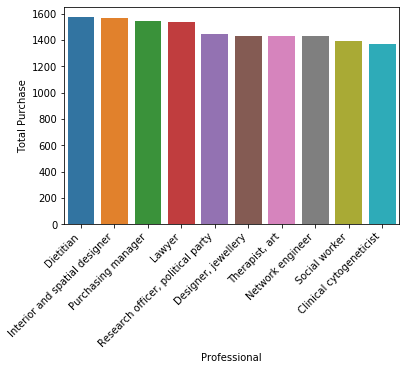

In [47]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1)
ax.set(xlabel="Professional", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Trade mark attorney'),
 Text(0, 0, 'Designer, industrial/product'),
 Text(0, 0, 'Translator'),
 Text(0, 0, "Politician's assistant"),
 Text(0, 0, 'Adult nurse'),
 Text(0, 0, 'Special effects artist'),
 Text(0, 0, 'Accountant, chartered management'),
 Text(0, 0, 'Advertising account planner'),
 Text(0, 0, 'Architect'),
 Text(0, 0, 'Further education lecturer')]

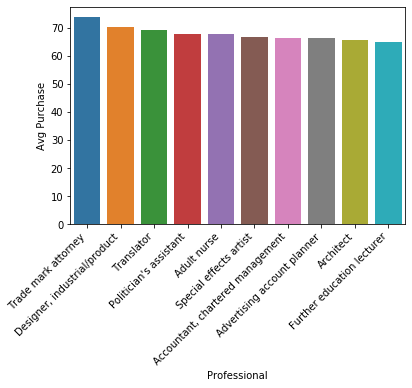

In [48]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res2)
ax.set(xlabel="Professional", ylabel = "Avg Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

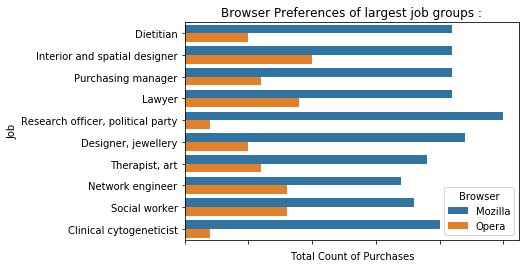

In [87]:
#Browser preferences of top 10 job types
jobBrowser = df.groupby(by=['Job', 'Browser'], as_index=False, )['Purchase Price'].count()
jobBrowser.sort_values(by='Purchase Price', ascending = False)#group by Job and sort by total purchase amount

plt.title(f"Browser Preferences of largest job groups :")
ax = sns.barplot(x = "Purchase Price_y", y = "Job",hue="Browser" , orient = 'h', data = res1.merge(jobBrowser,on = 'Job' ,how = 'inner'))
ax.set(ylabel="Job", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


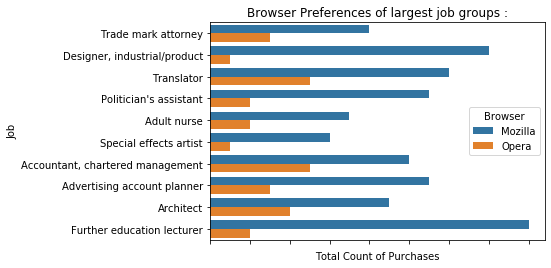

In [88]:
plt.title(f"Browser Preferences of largest job groups :")
ax = sns.barplot(x = "Purchase Price_y", y = "Job",hue="Browser" , orient = 'h', data = res2.merge(jobBrowser,on = 'Job' ,how = 'inner'))
ax.set(ylabel="Job", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

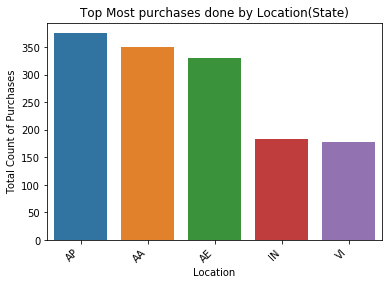

In [90]:
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
plt.title('Top Most purchases done by Location(State)')
ax = sns.barplot(x = "State", y = "Purchase Price", data = res)
ax.set(xlabel="Location", ylabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




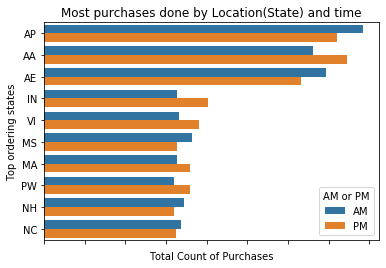

In [91]:
res=df.groupby(by='State', as_index=False)['Purchase Price'].count()
res = res.sort_values(by='Purchase Price', ascending=False).iloc[:10,:]
res4=df.groupby(by=['State','AM or PM'], as_index=False)['Purchase Price'].count()
res4= res4.sort_values(by='Purchase Price', ascending=False)

plt.title('Most purchases done by Location(State) and time')
ax = sns.barplot(x = "Purchase Price_y", y = "State",hue="AM or PM" , orient = 'h', \
                 data = res.merge(res4, on = 'State', how = 'inner'))
ax.set(ylabel="Top ordering states", xlabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [89]:
res4=df.groupby(by=['State','AM or PM'], as_index=False).count()[['State','Purchase Price','AM or PM']]
res4 = res4.pivot_table(values = 'Purchase Price', index = 'AM or PM', columns = 'State', aggfunc = 'sum')
res4

State,AA,AE,AK,AL,AP,AR,AS,AZ,CA,CO,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
AM or PM,,,,,,,,,,,,,,,,,,,,,
AM,165,173,82,83,196,63,61,74,70,65,...,66,71,69,72,83,65,77,87,71,70
PM,186,158,75,65,180,84,80,71,76,68,...,61,75,82,82,95,66,86,73,86,80


In [86]:
res4=df.groupby(by=['State','AM or PM'], as_index=False).sum()[['State','Purchase Price','AM or PM']]
res4 = res4.pivot_table(values = 'Purchase Price', index = 'AM or PM', columns = 'State', aggfunc = 'sum')
res4

State,AA,AE,AK,AL,AP,AR,AS,AZ,CA,CO,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
AM or PM,,,,,,,,,,,,,,,,,,,,,
AM,8583.282228,8479.530322,3976.905718,4399.890322,10456.372550,3233.488416,2990.279208,3478.751114,3424.425718,3085.141114,...,3410.518416,3369.238416,3876.51302,3532.831906,3924.987624,3575.593020,4009.468416,4301.390322,3714.911906,3497.94302
PM,9399.636832,7735.364926,3838.733812,3298.413812,9227.728738,4203.370322,4267.041906,3425.383812,3682.844604,3416.693812,...,2980.731906,3781.296510,4146.75651,4162.825718,4587.185718,3208.319208,3967.011114,4332.088416,4242.482228,4070.73651


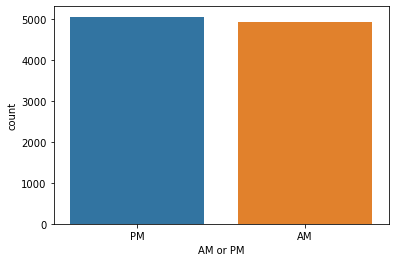

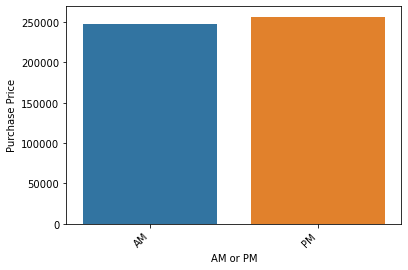

In [26]:

sns.countplot(df['AM or PM'],label='Count')
plt.show()
ax = sns.barplot(y = df.groupby('AM or PM')['Purchase Price'].sum(), x = df.groupby('AM or PM')['Purchase Price'].sum().index)
ax.set(xlabel="AM or PM", ylabel = "Purchase Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Top 5 most purchase done by professionals

In [32]:
print('The TOP 5 customers with max amount of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 customers with max amount of purchase...


,Email,Purchase Price
1084,brownsarah@gmail.com,198.830000
9549,wjohnson@yahoo.com,175.610000
1342,cgray@gmail.com,154.410000
9531,wilsonjohn@yahoo.com,153.360000
5255,lawrenceemily@yahoo.com,147.917302


[Text(0, 0, 'brownsarah@gmail.com'),
 Text(0, 0, 'wjohnson@yahoo.com'),
 Text(0, 0, 'cgray@gmail.com'),
 Text(0, 0, 'wilsonjohn@yahoo.com'),
 Text(0, 0, 'lawrenceemily@yahoo.com')]

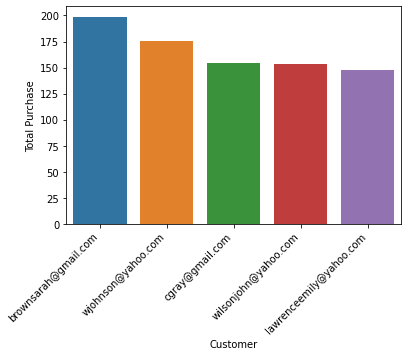

In [34]:
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res)
ax.set(xlabel="Customer", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [35]:
print('The TOP 5 customers with max amount of purchase and their companies')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
pd.merge(df, res, how='inner', on = 'Email')[['Email', 'Company']]



The TOP 5 customers with max amount of purchase and their companies


,Email,Company
0,wjohnson@yahoo.com,Morrison LLC
1,wjohnson@yahoo.com,Weiss-Smith
2,wilsonjohn@yahoo.com,Williams Inc
3,wilsonjohn@yahoo.com,Davis and Sons
4,cgray@gmail.com,Anderson-Adams
5,cgray@gmail.com,Mills-Mccarty
6,brownsarah@gmail.com,"Nichols, Parrish and Jackson"
7,brownsarah@gmail.com,"Davis, Smith and Horn"
8,lawrenceemily@yahoo.com,"Evans, Sims and Barnes"
9,lawrenceemily@yahoo.com,Johnson Group


Discover patterns for Purchase Price¶

In [36]:
df['Purchase Price'].describe()

count    10000.000000
mean        50.445186
std         27.662944
min          0.000000
25%         27.930000
50%         50.347302
75%         73.162500
max         99.990000
Name: Purchase Price, dtype: float64

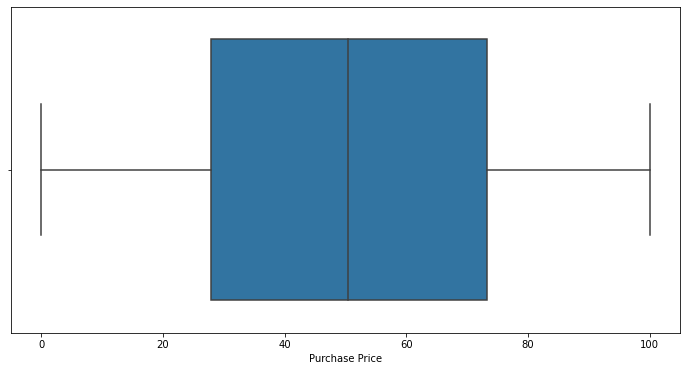

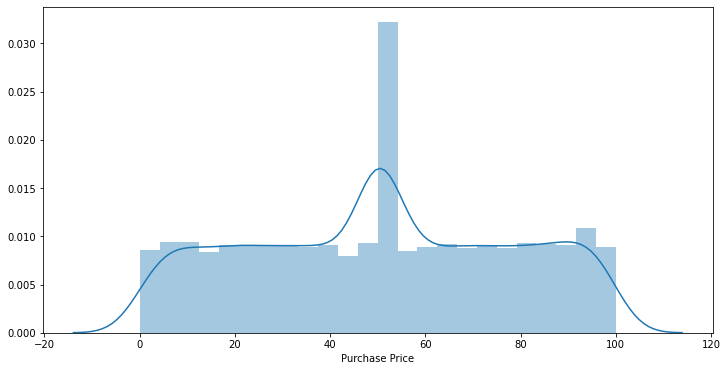

In [37]:
# check the distribution of Purchase price
plt.subplots(figsize=(12,6))
sns.boxplot(df['Purchase Price'])
plt.show()
plt.subplots(figsize=(12,6))
sns.distplot(df['Purchase Price'])
plt.show()

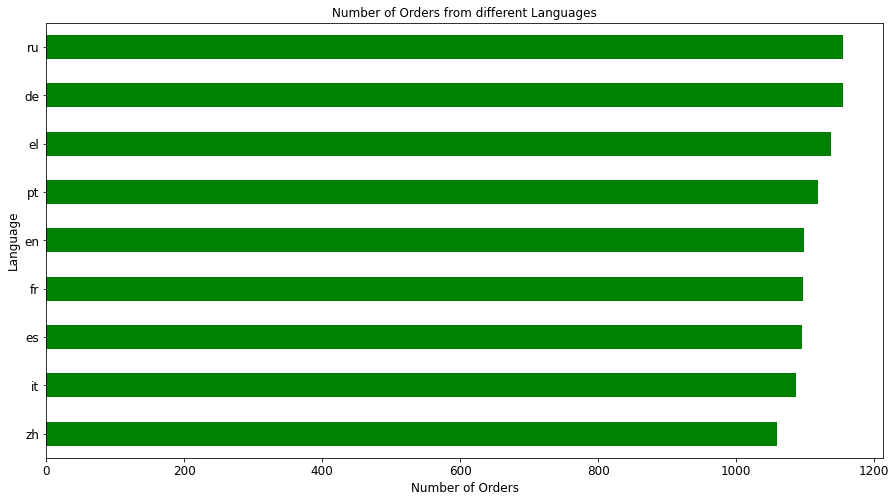

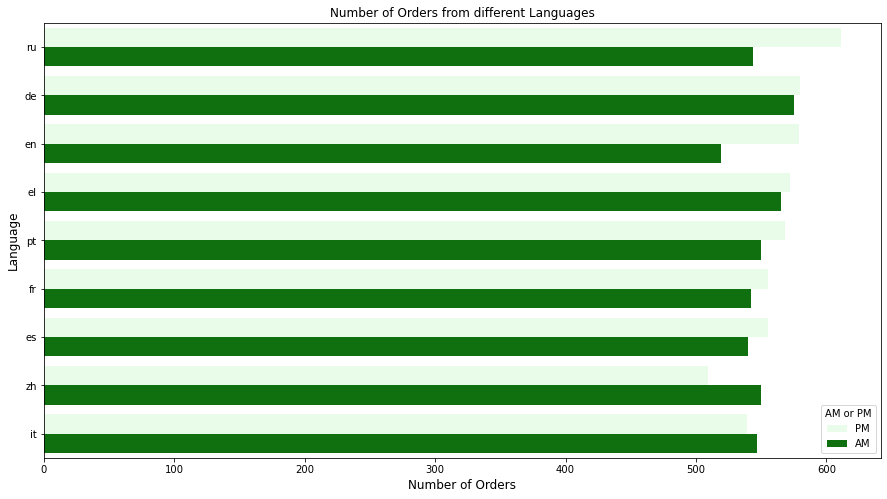

In [38]:
group_language_orders = df.groupby('Language')['Purchase Price'].count().sort_values()

# plot number of unique customers in each Language
plt.subplots(figsize=(15,8))
group_language_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

plt.subplots(figsize=(15,8))
group_language_order_hue = df.groupby(['Language', 'AM or PM'])['Purchase Price'].count().sort_values(ascending = False).reset_index()
sns.barplot(y = 'Language', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = group_language_order_hue,\
            color = 'green' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

Browser Usage Analysis for purchase¶

In [39]:
browser_data = df.groupby(by='Browser', as_index=False)['Purchase Price'].count()
browser_data

,Browser,Purchase Price
0,Mozilla,7924
1,Opera,2076


In [40]:
from matplotlib.pyplot import pie, axis, show
browser_data['Browser']=browser_data['Browser'].map({'Mozilla':0,'Opera':1})

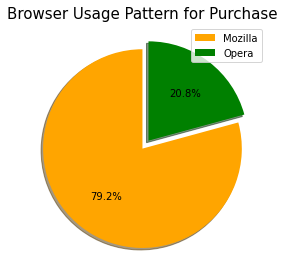

In [41]:
labels = ['Mozilla','Opera']
colors = ['orange', 'green'] 
explode =(0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,4)) 
ax1.pie(browser_data['Purchase Price'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
plt.title('Browser Usage Pattern for Purchase', fontsize = 15) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()


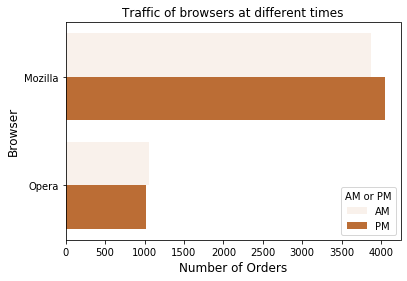

In [38]:
browser_data_hue = df.groupby(by=['Browser','AM or PM'], as_index=False)['Purchase Price'].count()
sns.barplot(y = 'Browser', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = browser_data_hue,\
            color = 'chocolate' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Browser', fontsize=12)
plt.title('Traffic of browsers at different times', fontsize=12)
plt.show()

In [43]:
print('The TOP 5 Companies with max amount of purchase...')
res = df.groupby(by=['Company'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 Companies with max amount of purchase...


,Company,Purchase Price
805,Brown Ltd,795.414604
8303,Williams LLC,723.630000
7168,Smith PLC,651.914604
7166,Smith LLC,644.777302
1724,Davis and Sons,576.147302


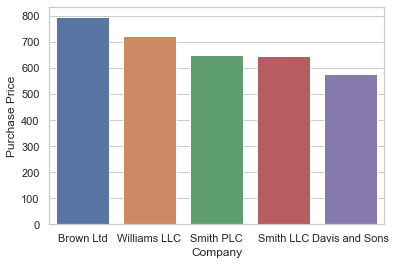

In [44]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Company", y="Purchase Price", data=res)

In [45]:
#res.iplot(kind='bar', x="Company", y="Purchase Price", color='green')


In [46]:
#All jobs registered
df['Job'].value_counts().index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Designer, jewellery', 'Research officer, political party',
       'Purchasing manager', 'Charity fundraiser', 'Dietitian',
       'Special educational needs teacher', 'Social worker',
       ...
       'Art gallery manager', 'Nurse, learning disability', 'Stage manager',
       'Music therapist', 'Special effects artist', 'Prison officer',
       'Editor, film/video', 'Actuary', 'Information systems manager',
       'Investment analyst'],
      dtype='object', length=623)

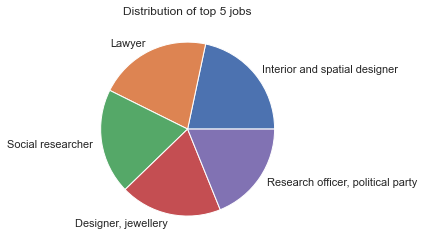

In [47]:
plt.pie(df['Job'].value_counts().head(), labels = df['Job'].value_counts().head().index )
plt.title('Distribution of top 5 jobs')
plt.show()

In [48]:
df['Job'].value_counts().head().index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Designer, jewellery', 'Research officer, political party'],
      dtype='object')

In [49]:
df['CC Provider'].str.split(pat = '\d', expand = True)[0].unique()#Find the 10 credit card providers

array(['JCB ', 'Mastercard', 'Discover', 'Diners Club / Carte Blanche',
       'VISA ', 'American Express', 'Voyager', 'Maestro'], dtype=object)

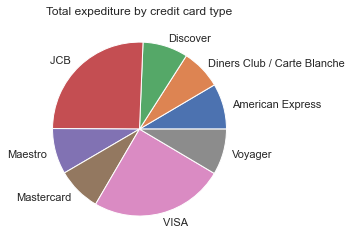

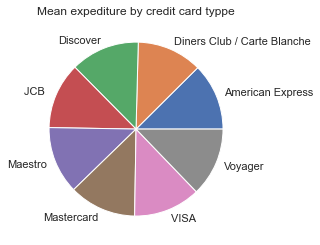

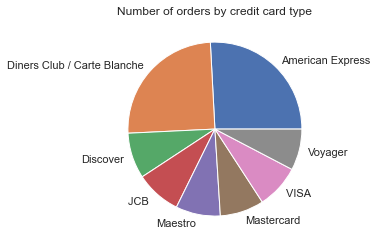

In [50]:
df['CC Provider'] = df['CC Provider'].str.split(pat = '\d', expand = True)[0]

cctotal = df.groupby('CC Provider')['Purchase Price'].sum()
ccmean = df.groupby('CC Provider')['Purchase Price'].mean()
ccorder = df['CC Provider'].value_counts()
ccindex = df.groupby('CC Provider')['Purchase Price'].mean().index
ccorder = df['CC Provider'].value_counts()

plt.pie(cctotal, labels = ccindex )
plt.title('Total expediture by credit card type')
plt.show()

plt.pie(ccmean, labels = ccindex )
plt.title('Mean expediture by credit card typpe')
plt.show()

plt.pie(ccorder, labels = ccindex )
plt.title('Number of orders by credit card type')
plt.show()


In [51]:
#Users with expired credit cards
exp = cleaned_ecom[(cleaned_ecom['CC Exp Year'] < 20) & (cleaned_ecom['CC Exp Month'] < 9)]
print("No of Users with expired cards ", exp['Email'].nunique())

No of Users with expired cards  2022
